<a href="https://colab.research.google.com/github/priya862/Capstone-2_Regression_Project/blob/main/Capstone_YesBank_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Yes Bank Stock Closing Price Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**Shubham Ashokrao Lawate
##### **Team Member 2 -**Yogesh Suresh Nagpure
##### **Team Member 3 -**Ashish Sunil Mahure
##### **Team Member 4 -**Priya Dhariwal

# **Project Summary -**
This Yesbank Stock Closing Price Prediction project is done by group of four people Shubham, Yogesh,Ashish and myself.And our aim is to predict the stock's closing price of the month.

In this project we get a dataset contains five features like Date,Open,High,Close and in this we have to observe the dataset and comes to a conclusion to best suitable regression model which will provides us the best fit lines (best predicted values). So for this task we distributed our work equally with each other to make perfect balance in equal contribution .

The very First task we did is that we load the data set in our colab and read the csv file given by almabetter team.Then we check the shape and size of data and got to know that there are 185 rows and five columns(features) .Then nest use describe to get the statistical information about our data and here we got to knoiw that our data is not normally distributed.

Then we carried out data cleaning ; in this we check the null values ,outliers and duplicates. In our date feature is given ,so we need to change that string in datetime format.

Then we started Exploratory Data Analysis(EDA) to get some important Insights from that.From the very first graph we got to know that the opening price and closing price has same result and the value of price decreasing from 2018 drastically as because of Rana Kapoor fraud case .

Then we plot distribution plot for dependent and independent features and got to know that data are rightly skewed ,then we apply log transformation to make it normalized. the very next process is that we check the correlation with dependent and independent features with the use of scatter plot and heat map and got to know that all the features are highly correlated and dropping anyone of them will affect our further models implementations.Then we split the data in 80:20 .

Then we implement 6 regression model
1. Linear regression
2. lasso regression
3. Ridge regression
4. ElasticNet regression
5. SVR
6. XGBoost

we have use following evaluation metrics:
1.   Mean Squared Error (MSE)
2.   Mean Absolute Error (MAE)
3. R-squared
4. Root Mean Squared Error (RMSE)
5. Mean Absolute Percentage Error (MAPE)

Then we calculated all the evaluation matrics for all the model and then got best suitable model and best predicted values.


# **GitHub Link -**  https://github.com/priya862/Capstone-2_Regression_Project


### **PROBLEM STATEMENT**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# ***Let's Begin !***

#**Know your data**

##**Import Libraries**

In [ ]:
#here we have imported the required libraries as per our requirements.

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

### **importing dataset**

In [ ]:
#importing the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Capstone 2/data_YesBank_StockPrices.csv")

always make the copy of original data ,it will helps to unchange the orginal dataset

In [ ]:
df_data=df.copy()

# **DATA EXPLORATION**

In [ ]:
df_data.shape

(185, 5)

**We have Yes Bank monthly stock price dataset. It has following features (Column)**:

 **1) Open** : Opening price of the stock of particular day

 **2) High** : It's the highest price at which a stock traded during a period

 **3) Low** : It's the lowest price at which stock traded during a period

 **4) Close** : Closing price of a stock at the end of a Trading Day

**5) Date** : In our data its monthly observation of stock since it listed

In [ ]:
df_data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df_data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
#details of given data set
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df_data.describe(include="all")

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


#data cleaning

In [ ]:
df_data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

here we have observed that there is no null value in our dataset

##**Check for outlier**


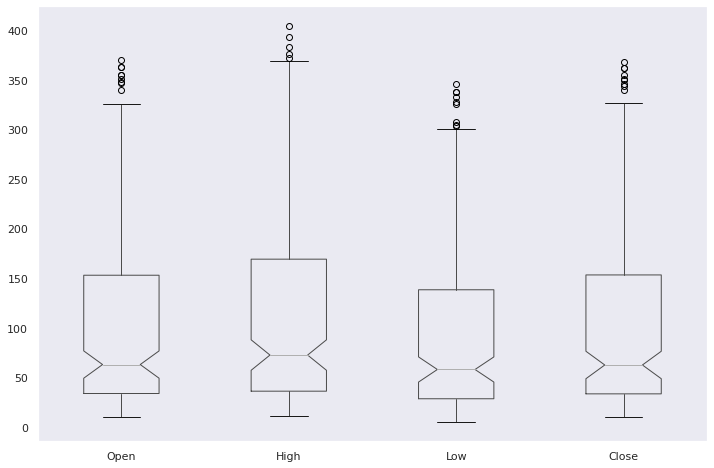

In [ ]:
fig = plt.figure(figsize =(12, 8))
boxplot = df_data.boxplot(column=['Open','High','Low',"Close"],grid=False,notch=True)

plt.show()

As above boxplot shows outliers this is because of stock price fall from nearly around 400 to 20.This happen quick within very few months thats why top value of stocks looks like outliers.

## convert string object to datetime object

In [ ]:
from datetime import datetime

df_data['Date'] = df_data['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

## Check the datatype of the columns after changing datatype of date

In [ ]:
df_data.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

here all the datatypes are same so there is no need to change any of them.

Now your dataset is ready for EDA.

#**Exploratory data analysis**

### **Yes bank Closing Price**

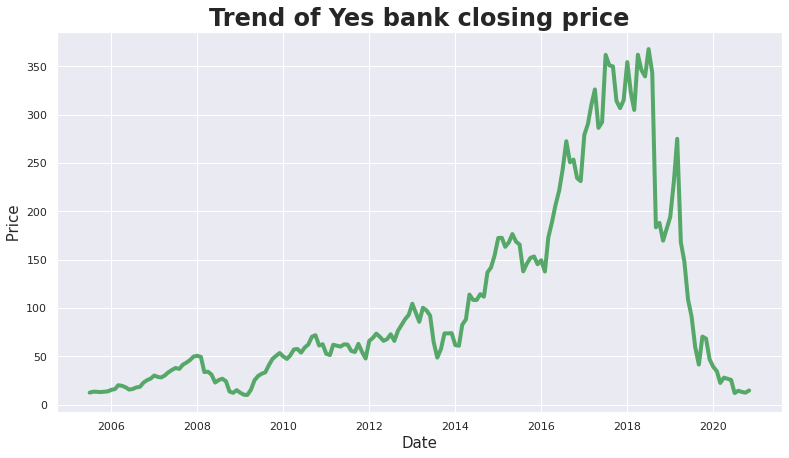

In [ ]:
plt.figure(figsize = (13,7))
plt.grid(True)
plt.title('Trend of Yes bank closing price',fontweight = 'bold',fontsize=24)
plt.plot(df_data['Date'],df_data['Close'],color='g',linewidth=4)
plt.xlabel('Date',fontsize = 15)
plt.ylabel(' Price ',fontsize = 15)
plt.show()

Here from 2016 to 2018 there is gradually increase in stock price but after 2018 it is observed that there is fall in stock price and this drastically happen change is because of Rana kapoor fraud case which affected the price of yes bank stocks.

## **Yes Bank Opening Price**

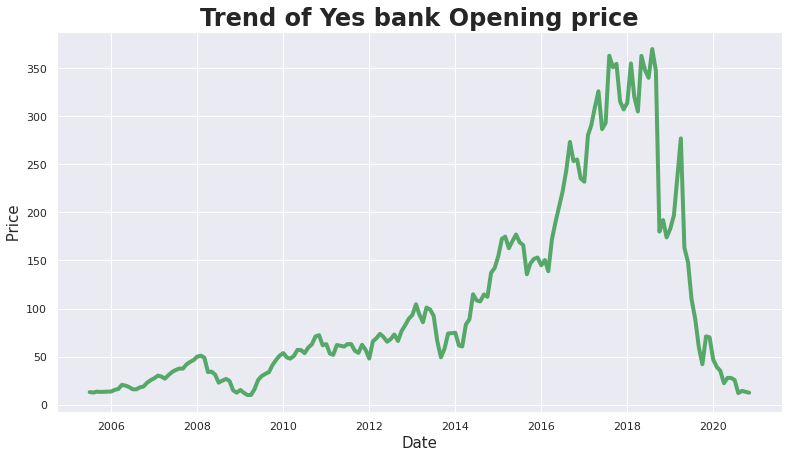

In [ ]:
plt.figure(figsize = (13,7))
plt.grid(True)
plt.title('Trend of Yes bank Opening price',fontweight = 'bold',fontsize=24)
plt.plot(df_data['Date'],df_data['Open'],color='g',linewidth=4)
plt.xlabel('Date',fontsize = 15)
plt.ylabel(' Price ',fontsize = 15)
plt.show()

Here also the opening price also affected because of fraud , before that the opening day price increases continuously till 2018.
We can take closing price of the stock as the dependent variable as it is the final price of the day.

## **Distribution of dependent variable Close Price .**

In [ ]:
# Independent Variables
indep_var=df_data[['High','Low','Open']]
#dependent variable
dep_var=df_data['Close']

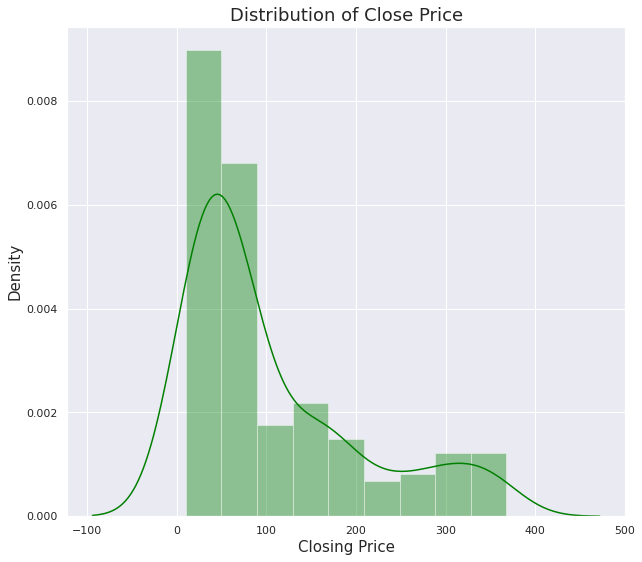

In [ ]:
# DEPENDENT VARIABLE

plt.figure(figsize=(10,9))
sns.distplot(df_data['Close'],color='green')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

The distribution is rightly skewed distribution. It may lead us to misleading results in view of statistical hyposthesis. It can be corrected by applying Log Transformation then we'll have a look how this data behave.

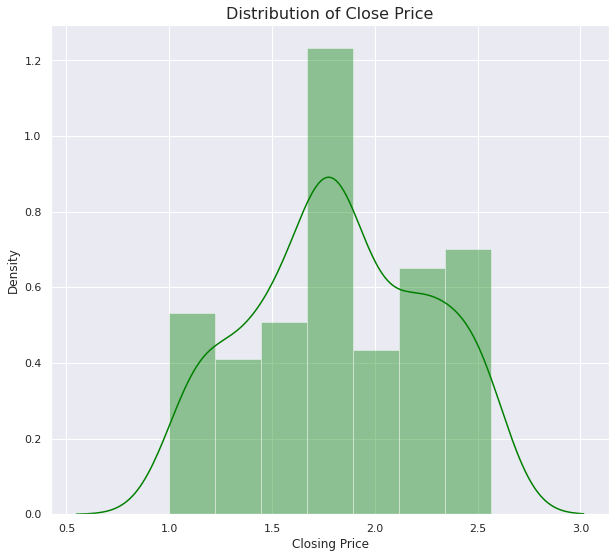

In [ ]:
plt.figure(figsize=(10,9))
sns.distplot(np.log10(df_data['Close']),color='green') #here we use log10 transformation
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

##  **DISTRIBUTION WITH INDEPENDENT VARIABLE**

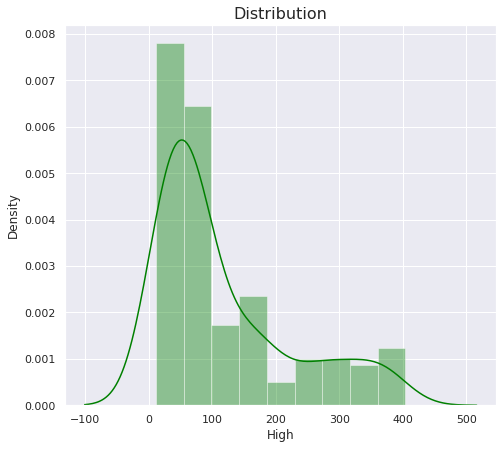

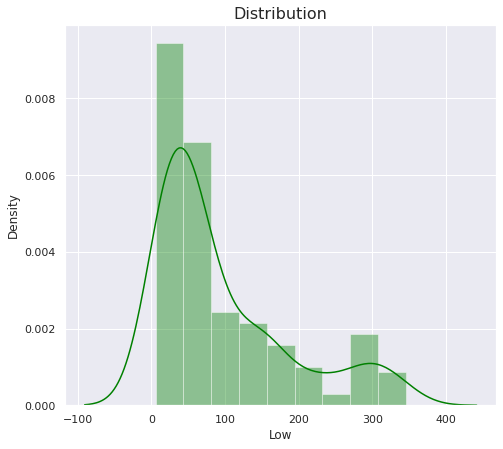

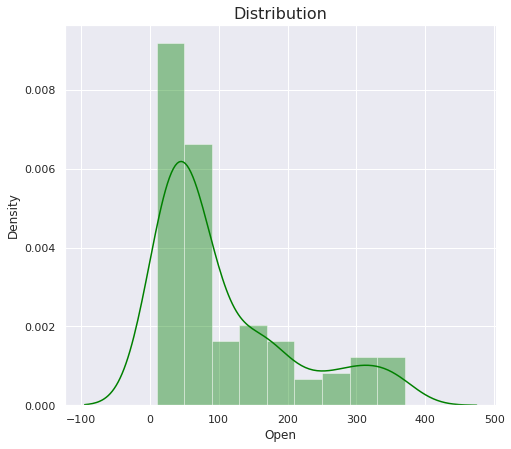

In [ ]:
# INDEPENDENT VARIABLES

for var in indep_var:
    plt.figure(figsize=(17,7))
    sns.set()
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df_data[var],color='green')
    fig.set_title("Distribution", fontsize=16)
    fig.set_ylabel('Density')
    fig.set_xlabel(var)

1. Here it is observed that all features are rightly skewed.
2. For that we need to apply log transformation again to make it normally distribution.

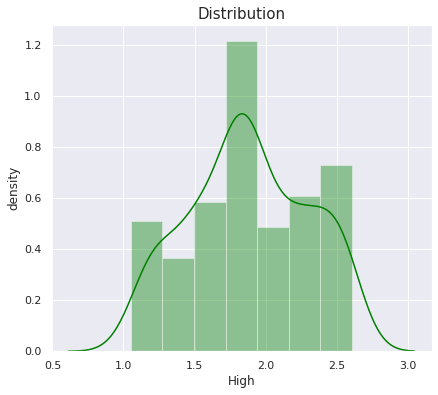

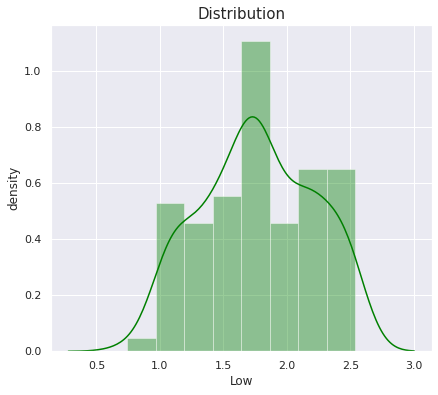

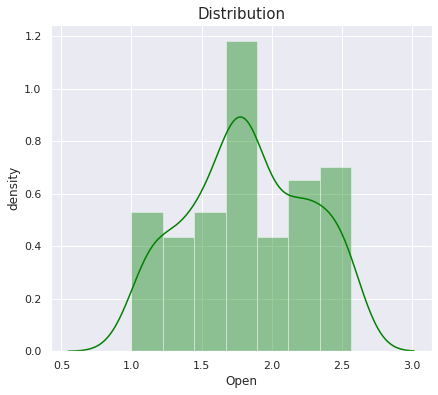

In [ ]:
#applying log transformation
for var in indep_var:
    plt.figure(figsize=(15,6))
    sns.set()
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df_data[var]),color ='green')
    fig.set_title("Distribution",fontsize=15)
    fig.set_ylabel('density')
    fig.set_xlabel(var)

now the data normally distributed

## **Next is to check the correlation with Independent Variable**


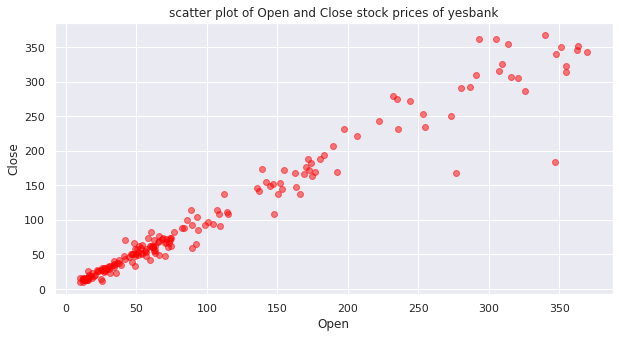

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(df_data['Open'],df_data['Close'],alpha = 0.5,color="red")
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

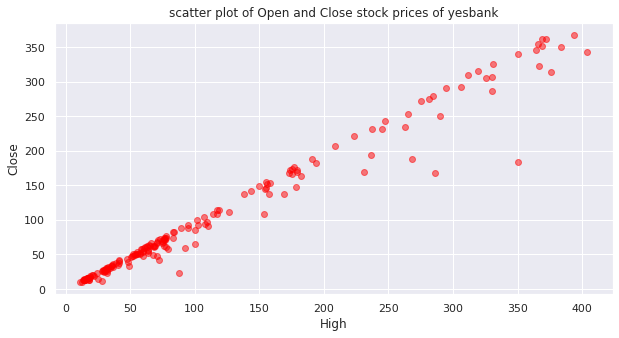

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(df_data['High'],df_data['Close'],alpha = 0.5,color="red")
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

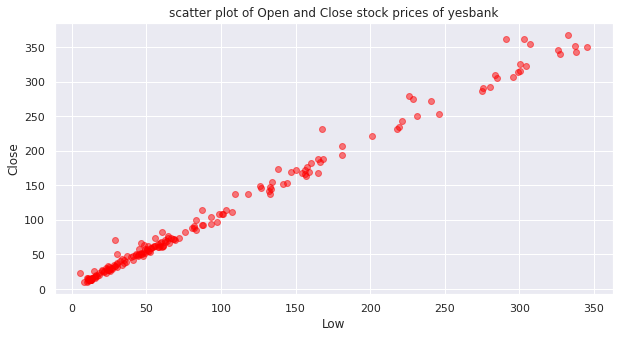

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(df_data['Low'],df_data['Close'],alpha = 0.5,color="red")
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()

Here it is observed that independent features are correlated with closing price.

## here we have check correlation using heatmap.

<Axes: >

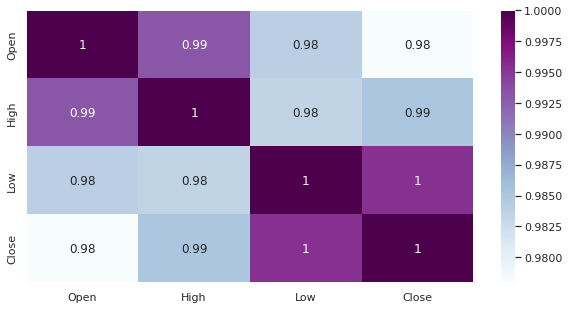

In [ ]:
#Lets find correlation with heatmap
plt.figure(figsize=(10,5))
correlation = df_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='BuPu')


Here it is observed that there is high correlation between independent variables which cause multicollinearity. High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

## **Checking Multicollinearity**

To check multicollinearity , we have to calculate Variation Inflation Factor(VIF)

A **variance inflation factor (VIF)** is a measure of the amount of multicollinearity in regression analysis. A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

In [ ]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

vif(df_data[[i for i in df_data.describe().columns if i not in ['Date', 'Close']]])


,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [ ]:
#Checking VIF without Date and Open features
vif(df_data[[i for i in df.describe().columns if i not in ['Date','Open', 'Close']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


In [ ]:
#Checking VIF without Date and High features
vif(df_data[[i for i in df.describe().columns if i not in ['Date','High', 'Close']]])

,variables,VIF
0,Open,65.64384
1,Low,65.64384


In [ ]:
#Checking VIF without Date and Low features
vif(df_data[[i for i in df.describe().columns if i not in ['Date','Low', 'Close']]])

,variables,VIF
0,Open,153.215921
1,High,153.215921


1. Since we have checked VIF with dropping each features(Open,High & Low) one by
one,better result of VIF was when we dropped 'Open' which was also realtively high.

2. Even dropping any one feature the VIF was high. This is because of all features are highly correlated and they are equally important for closing price prediction so we are not going to dropp any column.

3. As we have limited features, dropping any one of them will result in loss of important data which are essential for accurate model prediction and it will result in bad model.

4. Finally we will not dropp any column and will try to predict result and will see how model is performing with multicollinearity.

# **Data Transformation**

**splitting data**

1. The train_test_split() method is used to split our data into train and test sets.

2. Train set: The training dataset is a set of data that was utilized to fit the model. The dataset on which the model is trained. This data is seen and learned by the model.

3. Test set: The test dataset is a subset of the training dataset that is utilized to give an accurate evaluation of a final model fit.

X = Independent variable

Y = Dependent variable

In [ ]:

X = df_data.drop(columns=['Close','Date'])
y = df_data['Close']

Data must be normally distributed before apply normalization.

**Normalization** - Normalization is one of the feature scaling techniques. We particularly apply normalization when the data is skewed on the either axis i.e. when the data does not follow the gaussian distribution.In normalization, we convert the data features of different scales to a common scale which further makes it easy for the data to be processed for modeling. Thus, all the data features(variables) tend to have a similar impact on the modeling portion.

In [ ]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [ ]:
#Creating Trainig and Testing set of our dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#to check the shape of training Datasets.
X_train.shape

(148, 3)

In [ ]:
#to check the shape of test Dataset.
X_test.shape


(37, 3)

# **1.Linear Regression Model**
 It's a supervised learning algorithm and the simplest form of regression used to study the mathematical relationship between variables.

In [ ]:
#first import linear regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg_model=lin_reg.fit(X_train,y_train)
lin_reg_model.score(X_train, y_train)

0.8090973296947443

In [ ]:
#Checking the training accuracy of model
round(lin_reg_model.score(X_train,y_train),2)

0.81

In [ ]:
#Checking the testing accuracy of model
round(lin_reg_model.score(X_test,y_test),2)

0.83

In [ ]:
#prediction of test data.
y_pred = lin_reg_model.predict(X_test)
y_pred

array([1.53271165, 1.96685151, 1.61036375, 1.95591371, 1.66701732,
       1.53307377, 2.32010906, 1.47235081, 1.46198661, 2.27176343,
       2.59774191, 1.77196865, 2.00437373, 1.63989847, 2.73572843,
       2.44737489, 1.69461712, 1.51604264, 2.45270911, 1.61168007,
       1.44552783, 1.87477595, 2.01565305, 1.63782509, 2.25504837,
       1.63485715, 2.42543822, 1.46033686, 1.83193344, 1.62300074,
       2.8808576 , 2.77557818, 1.6959313 , 2.07184242, 1.56166337,
       1.59651659, 2.42252489])

Now,

we use Evaluation Metrics to measure the quality of the statistical or machine learning model. There are many different types of evaluation metrics available to test a model.In this project we will mainly use following evaluation metrics:

1.   Mean Squared Error (MSE):- The most common metric for regression tasks is MSE. It is the average of the squared difference between the predicted and actual value.

2.   Mean Absolute Error (MAE):-
This is simply the average of the absolute difference between the target value and the value predicted by the model. Not preferred in cases where outliers are prominent.

3. R-squared :-
R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

4. Root Mean Squared Error (RMSE):-
This is the square root of the average of the squared difference of the predicted and actual value.R-squared error is better than RMSE. This is because R-squared is a relative measure while RMSE is an absolute measure of fit

5. Mean Absolute Percentage Error (MAPE):-
The mean absolute percentage error (MAPE) is the percentage equivalent of MAE. The equation looks just like that of MAE, but with adjustments to convert everything into percentages.


In [ ]:
#Checking the Test performance of Linear Regression Model.
print('MSE            :', round(mean_squared_error(y_test,y_pred),4))
print('RMSE           :',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print('MAE            :',round(mean_absolute_error(y_test,y_pred),4))
print('MAPE           :',round(mean_absolute_percentage_error(y_test,y_pred),4))
print('r2 score       :',round(r2_score(y_test,y_pred),4))

MSE            : 0.032
RMSE           : 0.1788
MAE            : 0.1457
MAPE           : 0.087
r2 score       : 0.8283


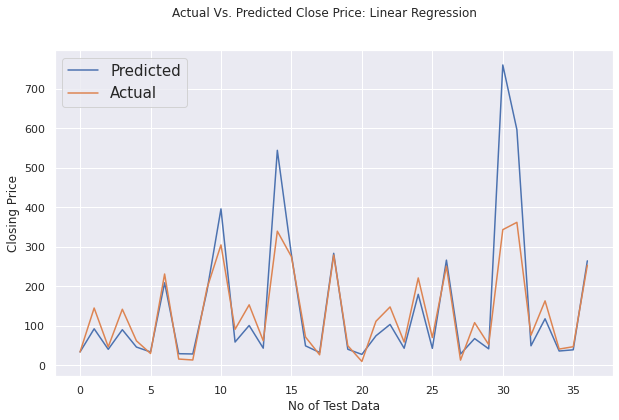

In [ ]:
#Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred))
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.show()

There is much value difference seen in price

# 2. **Lasso regression Model**
*  Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean.
*   Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients.

In [ ]:
#Implementing Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg_model=Lasso(alpha=0.001,max_iter=3000)
lasso_reg_model.fit(X_train,y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:
#Checking Training accuracy of Lasso Regression
round(lasso_reg_model.score(X_train,y_train),2)

0.81

In [ ]:
#Prediction
y_lasso_pred=lasso_reg_model.predict(X_test)
y_lasso_pred

array([1.53692497, 1.98023133, 1.6235291 , 1.95944014, 1.663196  ,
       1.5306697 , 2.32819192, 1.47489131, 1.46507807, 2.22765831,
       2.61890936, 1.78603697, 2.00991248, 1.64421209, 2.75761282,
       2.41369094, 1.69647548, 1.51644428, 2.41296696, 1.61503513,
       1.44848835, 1.87225396, 2.01829134, 1.63596891, 2.25156383,
       1.60690336, 2.4338849 , 1.46385807, 1.83580351, 1.63193888,
       2.87295451, 2.70978932, 1.69063659, 2.07992453, 1.5626562 ,
       1.6005584 , 2.42646768])

In [ ]:
# Checking the test performance of Lasso Regression Using Evaluation MAtrics

print("MSE                :",round(mean_squared_error(y_test, y_lasso_pred), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test, y_lasso_pred)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_lasso_pred),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_lasso_pred),4))
print("r2 score           :",round(r2_score(y_test, y_lasso_pred), 4))

MSE                : 0.0318
RMSE               : 0.1782
MAE                : 0.1466
MAPE               : 0.0875
r2 score           : 0.8295


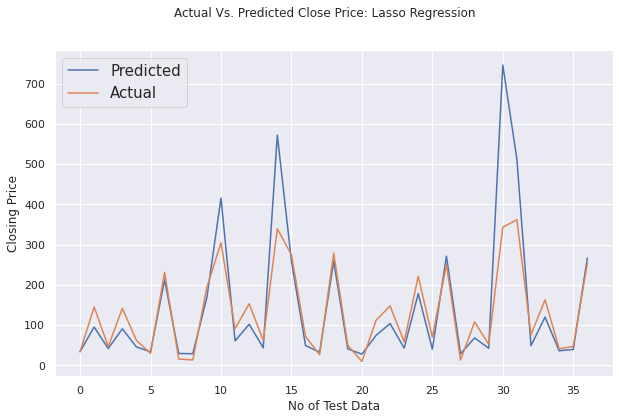

In [ ]:
#Plotting Actual vs Predicted for Lasso Regression
plt.figure(figsize=(10,6))
plt.plot(10**y_lasso_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.show()

Now, we Impliment **Cross-Validation** on Lasso,We must assure that our model got the correct patterns from the data, and it is not getting up too much noise. For this purpose, we use the cross-validation technique.

 It is one of the technique used to test the effectiveness of a machine learning models by dividing data into two segments: one used to learn or train a model and the other used to validate the model.If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.
It is also a re-sampling procedure used to evaluate a model if we have a limited data.

In [ ]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
lasso_cv=Lasso()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor=GridSearchCV(lasso_cv,parameters,scoring='neg_mean_squared_error',cv=3)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " negative mean squared error : ", lasso_regressor.best_score_)

The best fit alpha value : {'alpha': 0.01}

Using  {'alpha': 0.01}  negative mean squared error :  -0.035688728899261


In [ ]:
#Prediction
y_lasso_pred1=lasso_regressor.predict(X_test)
y_lasso_pred1

array([1.54344655, 1.97574886, 1.62792097, 1.95546498, 1.66658191,
       1.53734661, 2.31506742, 1.48294886, 1.47337939, 2.21706107,
       2.59857361, 1.786389  , 2.0046854 , 1.64806852, 2.73381171,
       2.39846747, 1.69903218, 1.52347191, 2.39776704, 1.61961931,
       1.45720363, 1.87045394, 2.01288734, 1.64002954, 2.24033887,
       1.61172638, 2.41816589, 1.47218926, 1.83490372, 1.63610595,
       2.84633038, 2.68723576, 1.69334389, 2.07296877, 1.56853742,
       1.60549805, 2.41089359])

In [ ]:
#Test performance of Lasso after Cross-Validation

print("MSE                :",round(mean_squared_error(y_test, y_lasso_pred1), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test, y_lasso_pred1)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_lasso_pred1),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_lasso_pred1),4))
print("r2 score           :",round(r2_score(y_test, y_lasso_pred1), 4))

MSE                : 0.0315
RMSE               : 0.1775
MAE                : 0.1459
MAPE               : 0.0877
r2 score           : 0.8308


After cross-validation accuracy increases

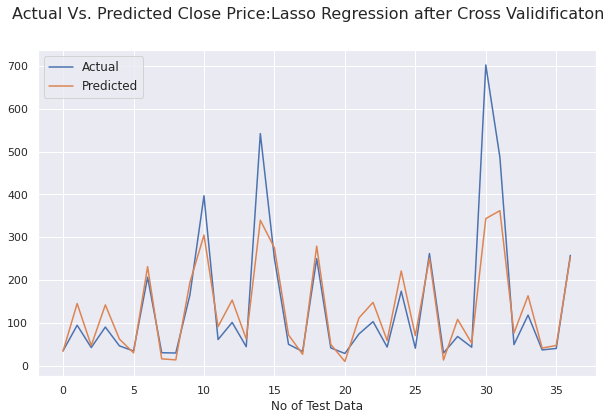

In [ ]:
#Plotting Actual vs Predicted for Lasso after Cross-Validation
plt.figure(figsize=(10,6))
plt.plot(10**y_lasso_pred1)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=12)
plt.suptitle('Actual Vs. Predicted Close Price:Lasso Regression after Cross Validificaton', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.show()

# **3. Ridge regression model**

1. Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity.
2. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.


In [ ]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=0.1)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#Checking the training accuracy of Ridge Regression
round(ridge_model.score(X_train,y_train),2)

0.81

In [ ]:
#Prediction
y_ridge_pred=ridge_model.predict(X_test)
y_ridge_pred

array([1.5334622 , 1.96922127, 1.61250463, 1.95665066, 1.66639979,
       1.53267972, 2.32162939, 1.47283889, 1.46256774, 2.26399758,
       2.60150464, 1.77432706, 2.00545486, 1.64069108, 2.73980868,
       2.44149328, 1.69500926, 1.51615183, 2.44573491, 1.61227623,
       1.44606734, 1.8743713 , 2.01597983, 1.63755424, 2.25458459,
       1.62973976, 2.42679241, 1.46099548, 1.83266795, 1.62454272,
       2.87947192, 2.76400948, 1.69504053, 2.07329341, 1.56187277,
       1.5972619 , 2.42342024])

In [ ]:
#Checking the test performance of Ridge Regression Using Evaluation MAtrics
print("MSE                :",round(mean_squared_error(y_test, y_ridge_pred), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test, y_ridge_pred)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_ridge_pred),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_ridge_pred),4))
print("r2 score           :",round(r2_score(y_test, y_ridge_pred), 4))

MSE                : 0.0319
RMSE               : 0.1786
MAE                : 0.1453
MAPE               : 0.0869
r2 score           : 0.8288


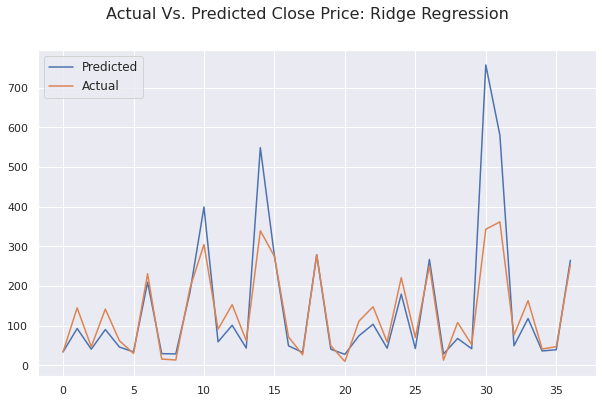

In [ ]:
#Plotting Actual vs Predicted for Ridge Regression
plt.figure(figsize=(10,6))
plt.plot(10**y_ridge_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=12)
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.show()

#cross validation on ridge

In [ ]:
#CrossValidation
#Hyperparameter Tunning
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value :",ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " negative mean squared error : ", ridge_regressor.best_score_)

The best fit alpha value : {'alpha': 1}

Using  {'alpha': 1}  negative mean squared error :  -0.035591064045074776


In [ ]:
#Prediction after CV
y_ridge_pred1=ridge_regressor.predict(X_test)
y_ridge_pred1

array([1.53685109, 1.97890367, 1.62336467, 1.95852668, 1.66344078,
       1.53105213, 2.32657126, 1.47489651, 1.46506572, 2.23070238,
       2.61615325, 1.78538915, 2.00882057, 1.64391416, 2.75389879,
       2.41549977, 1.69619106, 1.51658252, 2.41536176, 1.61495446,
       1.44857737, 1.87222063, 2.01836956, 1.63608468, 2.25075001,
       1.61011666, 2.43301121, 1.46380564, 1.83524698, 1.63153741,
       2.8723522 , 2.71396422, 1.69102192, 2.07885344, 1.56271006,
       1.60032936, 2.42466269])

In [ ]:
# Checking the test performance of Ridge Regression after CrossValidation Using Evaluation MAtrics

print("MSE                :",round(mean_squared_error(y_test, y_ridge_pred1), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test, y_ridge_pred1)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_ridge_pred1),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_ridge_pred1),4))
print("r2 score           :",round(r2_score(y_test, y_ridge_pred1), 4))

MSE                : 0.0317
RMSE               : 0.1781
MAE                : 0.1464
MAPE               : 0.0874
r2 score           : 0.8298


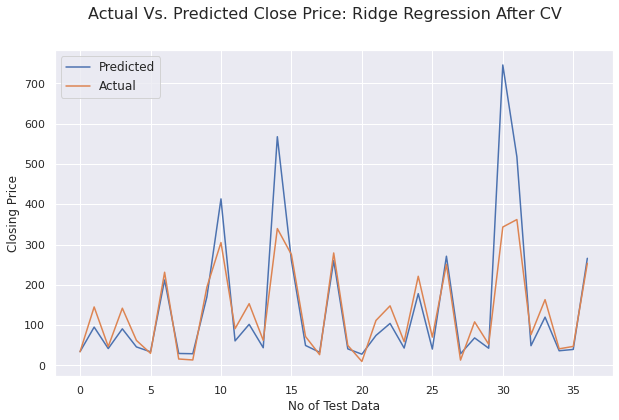

In [ ]:
#Plotting Actual vs Predicted for Ridge Regression after CrossValidation
plt.figure(figsize=(10,6))
plt.plot(10**y_ridge_pred1)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=12)
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.show()

# 4. **Elastic Net Regression Model**

The main purpose of ElasticNet Regression is to find the coefficients that minimize the sum of error squares by applying a penalty to these coefficients. ElasticNet combines L1 and L2 (Lasso and Ridge) approaches. As a result, it performs a more efficient smoothing process.

The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

In [ ]:
#Implementing Elastic Net Regression
from sklearn.linear_model import ElasticNet
elasticNet_reg_model=ElasticNet(alpha=0.1,l1_ratio=0.5)
elasticNet_reg_model.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#Checking training accuracy of ElasticNet Regression
round(elasticNet_reg_model.score(X_train,y_train),2)

0.79

In [ ]:
#Prediction
y_elasticNet_pred=elasticNet_reg_model.predict(X_test)
y_elasticNet_pred

array([1.57821253, 1.95877279, 1.66246747, 1.93294061, 1.68007429,
       1.56910095, 2.2488902 , 1.52362346, 1.51568508, 2.14267329,
       2.50403119, 1.79883792, 1.9770972 , 1.66851515, 2.61542647,
       2.30377118, 1.71063839, 1.55799923, 2.30125173, 1.64426503,
       1.50218845, 1.85878264, 1.99144153, 1.65784124, 2.17658379,
       1.6298757 , 2.34692393, 1.51478462, 1.83031628, 1.66252591,
       2.70731868, 2.54151723, 1.70317981, 2.04048248, 1.59765644,
       1.63129602, 2.32676717])

In [ ]:
#Checking the test performance of ElasticNet Regression Using Evaluation MAtrics
print("MSE                :",round(mean_squared_error(y_test, y_elasticNet_pred), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test, y_elasticNet_pred)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_elasticNet_pred),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_elasticNet_pred),4))
print("r2 score           :",round(r2_score(y_test, y_elasticNet_pred), 4))

MSE                : 0.0344
RMSE               : 0.1854
MAE                : 0.1514
MAPE               : 0.0924
r2 score           : 0.8155


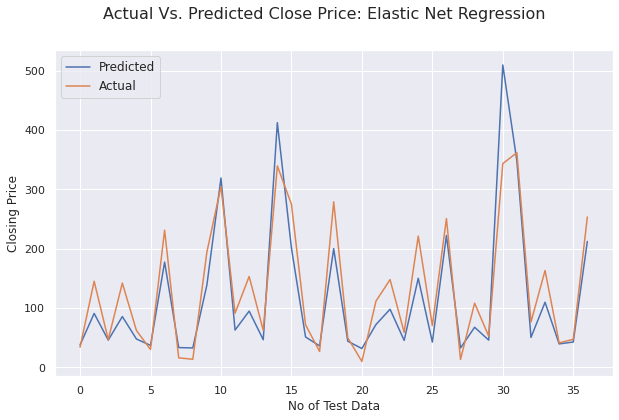

In [ ]:
#Plotting Actual vs Predicted for ElasticNet Regression
plt.figure(figsize=(10,6))
plt.plot(10**y_elasticNet_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=12)
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net Regression', fontsize=16)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.show()

#cross validation

In [ ]:
#cross validation
elastic=ElasticNet()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regg=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)
elastic_regg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value :" ,elastic_regg.best_params_)
print("\nUsing ",elastic_regg.best_params_, " the negative mean squared error : ", elastic_regg.best_score_)

The best fit alpha value : {'alpha': 0.01, 'l1_ratio': 0.4}

Using  {'alpha': 0.01, 'l1_ratio': 0.4}  the negative mean squared error :  -0.035176857455740486


In [ ]:
#Prediction
y_pred_elastic=elastic_regg.predict(X_test)
y_pred_elastic

array([1.53981924, 1.97789384, 1.62619228, 1.95700143, 1.66454946,
       1.53364021, 2.32156191, 1.47836527, 1.46867459, 2.22346746,
       2.60905078, 1.78654716, 2.00691477, 1.64576168, 2.74523429,
       2.40697321, 1.69731297, 1.51948847, 2.40647802, 1.6170668 ,
       1.45236609, 1.8712765 , 2.01642149, 1.63759912, 2.24573652,
       1.61049157, 2.42715514, 1.46745295, 1.83507555, 1.63386956,
       2.86079654, 2.700361  , 1.69176665, 2.07646422, 1.56518211,
       1.6026081 , 2.41827787])

In [ ]:
#Checking the test performance of ElasticNet Regression after CrossValidation Using Evaluation MAtrics
print("MSE                :",round(mean_squared_error(y_test, y_pred_elastic), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test, y_pred_elastic)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_pred_elastic),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),4))
print("r2 score           :",round(r2_score(y_test, y_pred_elastic), 4))

MSE                : 0.0316
RMSE               : 0.1778
MAE                : 0.1462
MAPE               : 0.0876
r2 score           : 0.8304


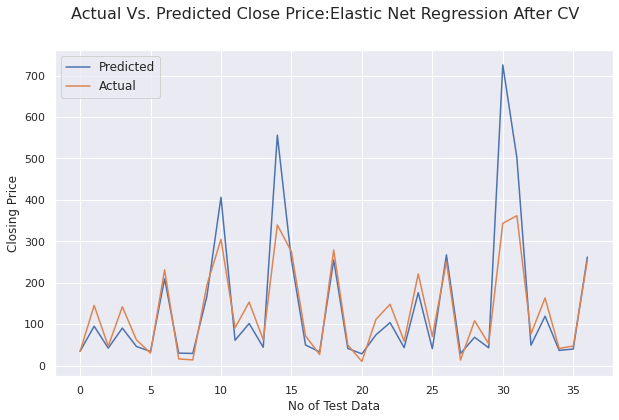

In [ ]:
#Plotting Actual vs Predicted for ElasticNet Regression after CrossValidation
plt.figure(figsize=(10,6))
plt.plot(10**y_pred_elastic)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=12)
plt.suptitle('Actual Vs. Predicted Close Price:Elastic Net Regression After CV', fontsize=16)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.show()

# 5. **SVR Model**
Support Vector regression is a type of Support vector machine that supports linear and non-linear regression. As it seems in the below graph, the mission is to fit as many instances as possible between the lines while limiting the margin violations.



In [ ]:
#importing SVm model
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')#Linear
#Fitting the model
svm_model=svm_regressor.fit(X_train,y_train)
#prediction
y_svm_pred=svm_model.predict(X_test)

In [ ]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_svm_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_svm_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_svm_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_svm_pred),4))
print("R2 :",round(r2_score(y_test, y_svm_pred), 4))

MSE : 0.0317
RMSE : 0.1782
MAE : 0.1373
MAPE : 0.0844
R2 : 0.8296


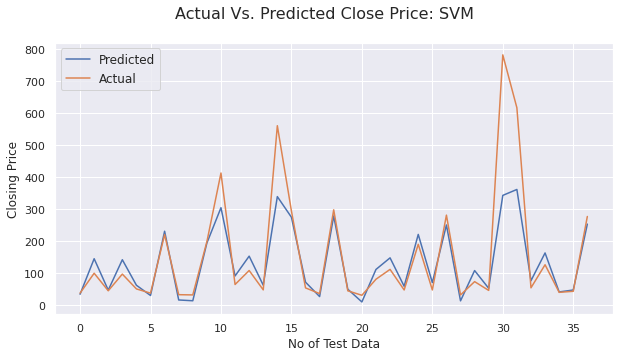

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_svm_pred))
plt.suptitle('Actual Vs. Predicted Close Price: SVM', fontsize=16)
plt.legend(['Predicted','Actual'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.show()

# 6. **XG Boost model**
*  XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library.
*It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:
from xgboost import XGBRegressor
xgb_regg_model=XGBRegressor()
xgb_regg_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#Checking the training accuracy of XGBoost Regression
xgb_regg_model.score(X_train,y_train)

0.9999846362649389

In [ ]:
#Prediction
y_xgb_pred=xgb_regg_model.predict(X_test)
y_xgb_pred

array([1.515307 , 2.1618562, 1.6262724, 2.168585 , 1.8656046, 1.4794528,
       2.381939 , 1.2418078, 1.1193668, 2.3010423, 2.4872508, 1.9724711,
       2.159749 , 1.7735958, 2.5181534, 2.3734756, 1.860402 , 1.4470361,
       2.3750987, 1.7099537, 1.0293021, 2.1565812, 2.2164085, 1.7546195,
       2.414707 , 1.6069139, 2.4359183, 1.105359 , 2.031151 , 1.7433884,
       2.5456479, 2.5124536, 1.8559929, 2.231086 , 1.5955932, 1.7509024,
       2.4351583], dtype=float32)

In [ ]:
#Checking the test performance of XGBoost Regression Using Evaluation MAtrics
print("MSE                :",round(mean_squared_error(y_test, y_xgb_pred), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test,y_xgb_pred)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_xgb_pred),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_xgb_pred),4))
print("r2 score           :",round(r2_score(y_test, y_xgb_pred), 4))

MSE                : 0.003
RMSE               : 0.055
MAE                : 0.0353
MAPE               : 0.0188
r2 score           : 0.9838


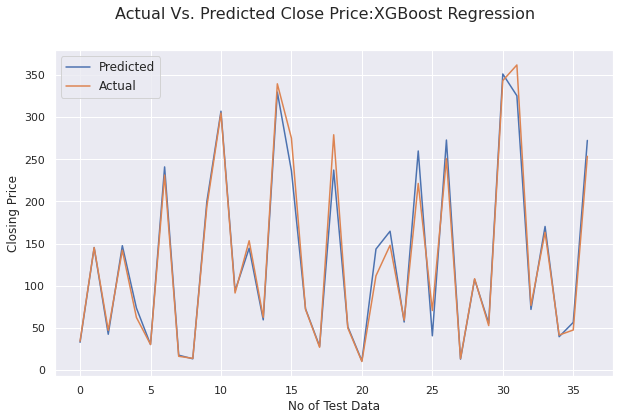

In [ ]:
#Plotting Actual vs Predicted for XGBoost Regression
plt.figure(figsize=(10,6))
plt.plot(10**y_xgb_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=12)
plt.suptitle('Actual Vs. Predicted Close Price:XGBoost Regression', fontsize=16)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.show()

#**Evaluation Matrics Comparison**

In [ ]:
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(X_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 4)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),4)
    MAE = round(mean_absolute_error(y_test, y_pred),4)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred),4)
    R2 = round(r2_score(y_test, y_pred), 4)


    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "MAPE"] = MAPE
    df.loc[i, "R2"] = R2


    #to get values in next rows for next model
    i=i+1
 #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)

  return df

In [ ]:
model = [lin_reg_model, lasso_reg_model, ridge_model, elasticNet_reg_model,svm_model,xgb_regg_model]

In [ ]:
# now pass through function
#Evaluation Matrics Comparison
matrics_compare_df = compare_model(X_train, X_test, y_train, y_test, model)
matrics_compare_df.sort_values(by=['R2'],ascending=True,inplace=True)
matrics_compare_df

,Model,MSE,RMSE,MAE,MAPE,R2
5,ElasticNet,0.0344,0.1854,0.1514,0.0924,0.8155
4,LinearRegression,0.0320,0.1788,0.1457,0.0870,0.8283
3,Ridge,0.0319,0.1786,0.1453,0.0869,0.8288
2,Lasso,0.0318,0.1782,0.1466,0.0875,0.8295
1,SVR,0.0317,0.1782,0.1373,0.0844,0.8296
0,XGBRegressor,0.0030,0.0550,0.0353,0.0188,0.9838


# **Conclusion**



*   Exploratory Data Analysis
1. from 2016 to 2018 stock closing price increase but after year 2018 it started decreasing because of Rana Kapoor case
2. same pattern of observations for the opening price also .
3. And according to above two reason the point that the stock price of yes bank falls down after 2018 and it is not beneficial for investors to invest
4. after plotting distplot we got to know that data for dependent and indepent variables are rightly skewed for that we applied log transformation.
5. next we got to know that independent features are highly correlated after plotting scatter plots.
6. after using heat map we also get that independent features are highly correlated  this cuase high multicollinearity
7. after calculating vif we get that all the available features are most important for closing price prediction so will not drop it from data set.




*   dependent variable strongly dependent on independent variables


*  we get highest accuracy of 99.99%

*   ridge and lasso has near about same R2 score
*   where as elastic net shows lowest R2 score and high MSE ,RMSE,MAE,MAPE values

* XGBoost Regressor end up with Highest r2 value and the predicted values are nearly equal to the actual values as we got 99 % accuracy

